<Figure size 432x288 with 0 Axes>

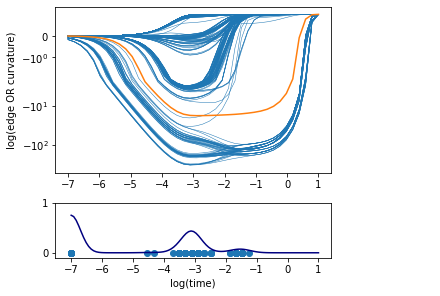

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from geocluster import geocluster
from sklearn.neighbors import KernelDensity

G = nx.read_gpickle("clique_of_cliques_0_.gpickle")
gc = geocluster.GeoCluster(G)
gc.load_curvature()

plt.figure()
fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[3, 1], height_ratios=[3, 1])
gs.update(wspace=0.00)
gs.update(hspace=0)
        
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(np.log10(gc.T), gc.Kappa.T, c='C0', lw=0.5)
ax1.plot(np.log10(gc.T), np.mean(gc.Kappa, axis=0), c='C1')
ax1.set_yscale('symlog')
ax1.set_ylabel('log(edge OR curvature)')
        
ax2 = fig.add_subplot(gs[1, 0])
        
#find minima
mins = [ np.min(gc.Kappa[i]) for i in range(gc.Kappa.shape[0]) ]
mins = np.array(mins)[:, np.newaxis]
inds =  [ np.argmin(gc.Kappa[i]) for i in range(gc.Kappa.shape[0]) ]
    
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(np.log10(gc.T[inds])[:, np.newaxis])
Tind = np.linspace(np.log10(gc.T[0]),np.log10(gc.T[-1]),100)[:, np.newaxis]
log_dens = kde.score_samples(Tind)
#ax2.fill(Tind[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax2.plot(Tind[:, 0], np.exp(log_dens), color='navy', linestyle='-', label="kernel = '{0}'".format(kernel))
    
ax2.scatter(np.log10(gc.T[inds]), np.zeros_like(inds))
ax2.tick_params(axis='x', which='both', left=False, top=False, labelleft=False)
ax2.set_ylim([-0.1,1])
ax2.set_xlabel('log(time)')
        
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(mins)
minind = np.linspace(np.min(gc.Kappa),1,100)[:, np.newaxis]
log_dens = kde.score_samples(minind)

plt.show()